In [1]:
from pathlib import Path
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
# from mpl_toolkits.basemap import Basemap
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader
from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid
import pandas as pd 
import geopandas as gpd
import seaborn as sns
# import pygeos
# Import modules
import xarray as xr
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
import math
import datetime
from datetime import timedelta

import math
# importing the libraries 
from sklearn.preprocessing import LabelBinarizer 
import matplotlib as mpl


/Users/weitao/anaconda3/lib/python3.10/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
GFEDlis = []
for path in Path('Fire/GFED/').rglob('*.hdf5'):
    GFEDlis.append(str(path))
# for path in Path('./ZonalTableSEA1015/').rglob('*2022*.csv'):
#     lisSEA.append(str(path))
GFEDlis

['Fire/GFED/GFED4.1s_2021_beta.hdf5', 'Fire/GFED/GFED4.1s_2022_beta.hdf5']

In [3]:
GEMSlis0245 = ['Fire/GEMS/GEMS_2022m2021_01_0245.nc',
 'Fire/GEMS/GEMS_2022m2021_02_0245.nc',
 'Fire/GEMS/GEMS_2022m2021_03_0245.nc',
 'Fire/GEMS/GEMS_2022m2021_04_0245.nc']
GEMSlis0445 = ['Fire/GEMS/GEMS_2022m2021_01_0445.nc',
 'Fire/GEMS/GEMS_2022m2021_02_0445.nc',
 'Fire/GEMS/GEMS_2022m2021_03_0445.nc',
 'Fire/GEMS/GEMS_2022m2021_04_0445.nc']
GEMSlis0645 = ['Fire/GEMS/GEMS_2022m2021_01_0645.nc',
 'Fire/GEMS/GEMS_2022m2021_02_0645.nc',
 'Fire/GEMS/GEMS_2022m2021_03_0645.nc',
 'Fire/GEMS/GEMS_2022m2021_04_0645.nc']


In [4]:
months = ['01','02','03','04','05','06','07','08','09','10','11','12']

columns = ['lat', 'lon', 'year', 'month', 'C', 'DM', 'UTC_0-3h', 'UTC_12-15h',
       'UTC_15-18h', 'UTC_18-21h', 'UTC_21-24h', 'UTC_3-6h', 'UTC_6-9h',
       'UTC_9-12h', 'DM_AGRI', 'DM_BORF', 'DM_DEFO', 'DM_PEAT', 'DM_SAVA',
       'DM_TEMF']

gfed = pd.DataFrame(columns = columns)

for yearEmi in GFEDlis:
    corr = xr.open_dataset(yearEmi, engine="netcdf4").to_dataframe()
    for mon in months:
        try:
            emis = xr.open_dataset(yearEmi, engine="netcdf4", group = 'emissions/'+mon).to_dataframe()
#             print(1)
            partitioning = xr.open_dataset(yearEmi, engine="netcdf4", group = 'emissions/'+mon+'/partitioning').to_dataframe()
            diurnal = xr.open_dataset(yearEmi, engine="netcdf4", group = 'emissions/'+mon+'/diurnal_cycle').to_dataframe()
#             print(2)
            gfedT = pd.concat([emis, corr, partitioning, diurnal], axis=1).reset_index()
            gfedT['year'] = str(yearEmi)[-14:-10]
            gfedT['month'] = mon
            gfedT = gfedT[columns]
            gfedT = gfedT[(gfedT['lat']>10)&(gfedT['lat']<30)&(gfedT['lon']>90)&(gfedT['lon']<110)]
#             print(3)

            gfed = pd.concat([gfed,gfedT])
        except:
            print(yearEmi + '?' + mon)
gfed

,lat,lon,year,month,C,DM,UTC_0-3h,UTC_12-15h,UTC_15-18h,UTC_18-21h,UTC_21-24h,UTC_3-6h,UTC_6-9h,UTC_9-12h,DM_AGRI,DM_BORF,DM_DEFO,DM_PEAT,DM_SAVA,DM_TEMF
346680,29.875,90.125,2021,01,0.0,0.0,0.031380,0.096860,0.054151,0.033291,0.031302,0.168124,0.356744,0.228148,0.030389,0.0,0.0,0.0,0.969611,0.0
346681,29.875,90.375,2021,01,0.0,0.0,0.031380,0.096860,0.054151,0.033291,0.031302,0.168124,0.356744,0.228148,0.030389,0.0,0.0,0.0,0.969611,0.0
346682,29.875,90.625,2021,01,0.0,0.0,0.031380,0.096860,0.054151,0.033291,0.031302,0.168124,0.356744,0.228148,0.030389,0.0,0.0,0.0,0.969611,0.0
346683,29.875,90.875,2021,01,0.0,0.0,0.031380,0.096860,0.054151,0.033291,0.031302,0.168124,0.356744,0.228148,0.000000,0.0,0.0,0.0,1.000000,0.0
346684,29.875,91.125,2021,01,0.0,0.0,0.031380,0.096860,0.054151,0.033291,0.031302,0.168124,0.356744,0.228148,0.030389,0.0,0.0,0.0,0.969611,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460515,10.125,108.875,2022,12,0.0,0.0,0.050068,0.062124,0.034230,0.013260,0.011477,0.258091,0.405644,0.165106,0.000000,0.0,0.0,0.0,0.000000,0.0
460516,10.125,109.125,2022,12,0.0,0.0,0.050068,0.062124,0.034230,0.013260,0.011477,0.258091,0.405644,0.165106,0.000000,0.0,0.0,0.0,0.000000,0.0
460517,10.125,109.375,2022,12,0.0,0.0,0.050068,0.062124,0.034230,0.013260,0.011477,0.258091,0.405644,0.165106,0.000000,0.0,0.0,0.0,0.000000,0.0
460518,10.125,109.625,2022,12,0.0,0.0,0.050068,0.062124,0.034230,0.013260,0.011477,0.258091,0.405644,0.165106,0.000000,0.0,0.0,0.0,0.000000,0.0


In [5]:
# https://www.geo.vu.nl/~gwerf/GFED/GFED4/ancill/GFED4_Emission_Factors.txt
# emission factor (g HCHO per kg DM burned)
# DM emissions (kg DM per m2 per month)
gfed['HCHO'] = gfed['DM'] * (gfed['DM_AGRI']*2.08 + gfed['DM_BORF']*1.86 + gfed['DM_DEFO']*1.73 + gfed['DM_PEAT']*1.4 + gfed['DM_SAVA']*0.73 + gfed['DM_TEMF']*2.09)
# g HCHO per m2 per month TO daily
gfed['Days'] = gfed['month'].map({'01':31,'02':28,'03':31,'04':30})
gfed['HCHO_Daily'] = gfed['HCHO'] / gfed['Days'] 
gfed['HCHO_Daily_KG_KM2'] = gfed['HCHO_Daily'] * 1e3 

# HCHO Molecular Mass: 30
gfed['HCHO_VCD_e15'] = gfed['HCHO_Daily'] * 6.02214*10000/30 # scaling factor: 1e15 
gfed[gfed['HCHO']>0]


,lat,lon,year,month,C,DM,UTC_0-3h,UTC_12-15h,UTC_15-18h,UTC_18-21h,...,DM_BORF,DM_DEFO,DM_PEAT,DM_SAVA,DM_TEMF,HCHO,Days,HCHO_Daily,HCHO_Daily_KG_KM2,HCHO_VCD_e15
346685,29.875,91.375,2021,01,0.109643,0.000225,0.031380,0.096860,0.054151,0.033291,...,0.0,0.000000,0.0,0.887337,0.0,0.000198,31.0,0.000006,0.006401,0.012850
346736,29.875,104.125,2021,01,0.382805,0.000797,0.038497,0.093727,0.058009,0.032116,...,0.0,0.000000,0.0,0.028849,0.0,0.001626,31.0,0.000052,0.052445,0.105277
348123,29.625,90.875,2021,01,1.273078,0.002610,0.031380,0.096860,0.054151,0.033291,...,0.0,0.000000,0.0,0.946959,0.0,0.002092,31.0,0.000067,0.067478,0.135455
348124,29.625,91.125,2021,01,0.112572,0.000231,0.031380,0.096860,0.054151,0.033291,...,0.0,0.000000,0.0,0.923240,0.0,0.000192,31.0,0.000006,0.006208,0.012461
348125,29.625,91.375,2021,01,0.477641,0.000979,0.031380,0.096860,0.054151,0.033291,...,0.0,0.000000,0.0,0.976130,0.0,0.000746,31.0,0.000024,0.024062,0.048301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457626,10.625,106.625,2022,12,1.305593,0.002714,0.030017,0.065588,0.031697,0.005690,...,0.0,0.000000,0.0,0.081239,0.0,0.005348,NaN,NaN,NaN,NaN
457628,10.625,107.125,2022,12,1.150456,0.002371,0.042911,0.067887,0.035014,0.006652,...,0.0,0.000000,0.0,0.606723,0.0,0.002990,NaN,NaN,NaN,NaN
459059,10.375,104.875,2022,12,0.204219,0.000421,0.031986,0.066139,0.033398,0.005953,...,0.0,0.313909,0.0,0.202042,0.0,0.000714,NaN,NaN,NaN,NaN
459063,10.375,105.875,2022,12,1.086189,0.002255,0.048746,0.070489,0.037722,0.007484,...,0.0,0.000000,0.0,0.164680,0.0,0.004189,NaN,NaN,NaN,NaN


In [6]:
GEMSlisD = [
 'Fire/GEMS/GEMS_2022m2021_03_0245.nc',
 'Fire/GEMS/GEMS_2022m2021_03_0445.nc',
 'Fire/GEMS/GEMS_2022m2021_03_0645.nc',
]

In [7]:
# UTC 7
int(str(GEMSlisD[0])[-7:-5]) + 8

10

/var/folders/4y/knznw84s4p5d2d77tb6wyq6h0000gn/T/ipykernel_29924/972897903.py:17: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.1, hspace=0,top=0.935)
/Users/weitao/anaconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


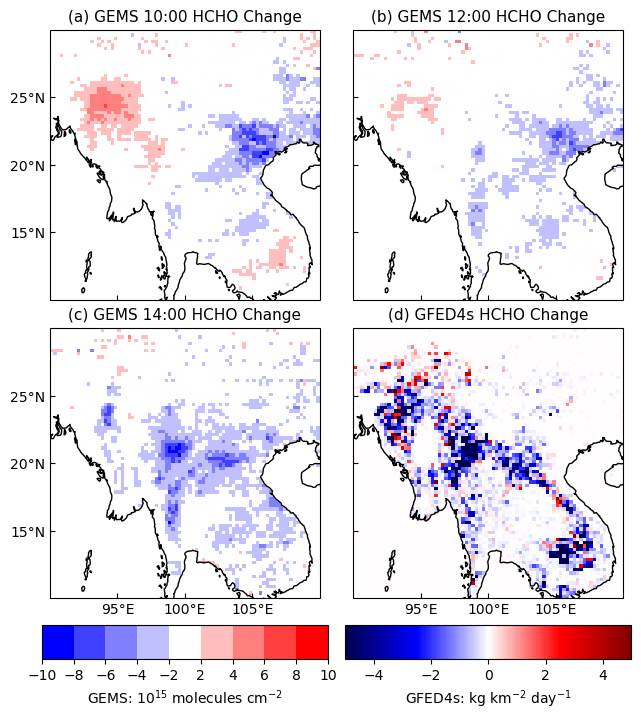

In [10]:
# cmap = mpl.cm.bwr
bounds = [-10, -8, -6, -4, -2,  2, 4, 6, 8, 10]
# bounds = [-10, -7.5, -5, -2.5,  2.5, 5, 7.5, 10]
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
alp = ['a','b','c','d','e','f','g','h','i','j','k','l','m','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

monthLable = ['January', 'February', 'March' ,'April']

cm = 1/2.54  # centimeters in inches
plt.rcParams['figure.dpi']=600
plt.style.use('default')

fig = plt.figure(layout="constrained", figsize=(16*cm, 18*cm))
plt.subplots_adjust(wspace=0.1, hspace=0,top=0.935)

gs = GridSpec(3, 2, figure=fig, height_ratios=[4, 4, 0.5])


ax1 = fig.add_subplot(gs[0, 0], projection=cartopy.crs.PlateCarree())
ax2 = fig.add_subplot(gs[0, 1], projection=cartopy.crs.PlateCarree())
ax3 = fig.add_subplot(gs[1, 0], projection=cartopy.crs.PlateCarree())
ax4 = fig.add_subplot(gs[1, 1], projection=cartopy.crs.PlateCarree())

axs = [ax1, ax2, ax3, ax4, 

      ]

bx1 = fig.add_subplot(gs[2, 0])
bx2 = fig.add_subplot(gs[2, 1])
bxs = [bx1, bx2,
      ]

extent = [90, 110, 10, 30]

yr = '2021'
gfedHCHO = gfed[gfed['year']==yr]
DiurLis = ['Morning', 'Midday', 'Afternoon']

def adjustFig(f):
    f.set_xlabel('', labelpad = 0.1,color='white')
    f.set_ylabel('', labelpad = 0.1,color='white')
    f.add_feature(cfeature.COASTLINE, linewidth=1, alpha=1,color='black', zorder=11)    
    f.set_extent(extent)
    f.set_yticks(np.arange(15,29,5), crs=ccrs.PlateCarree())

    f.yaxis.set_major_formatter(lat_formatter)
    f.set_xticks(np.arange(95,106,5), crs=ccrs.PlateCarree())
    f.xaxis.set_major_formatter(lon_formatter)
    for pos in ['right', 'top', 'bottom', 'left']:
        f.spines[pos].set_visible(False) 

for count in range(4):
    count2 = count


    if (count<3):    

        try:
            gg = xr.open_dataset(GEMSlisD[count])['HCHO_column']
        except:
            print(count)
        im = gg.plot(ax=axs[count]
                                 ,vmin = -10, vmax = 10
                                     ,cmap = "bwr"
            ,levels=bounds
                                 ,transform = ccrs.PlateCarree()
                                 ,add_colorbar=False
                                )
        axs[count].set_title('('+alp[count]+') GEMS '+str(int(str(GEMSlisD[count])[-7:-5]) + 8)+':00 HCHO Change',size=11)
        axs[count].add_feature(cfeature.OCEAN, zorder=1,color='white')

        adjustFig(axs[count])

        cbar = fig.colorbar(im, cax=bx1, orientation='horizontal',label='GEMS: 10$^{15}$ molecules cm$^{-2}$')
    
        
    elif (count==3):           

            
        try:
            count2 = count
            gfedHCHO = gfed[gfed['month']=='03']
            gfedHCHO21 = gfedHCHO[gfedHCHO['year']=='2021'].set_index(['lat','lon']).to_xarray()['HCHO_Daily_KG_KM2']
            gfedHCHO22 = gfedHCHO[gfedHCHO['year']=='2022'].set_index(['lat','lon']).to_xarray()['HCHO_Daily_KG_KM2']
            gfedHCHOdelta = gfedHCHO22 - gfedHCHO21
            im = gfedHCHOdelta.plot(ax=axs[count]
                                 ,vmin = -5, vmax = 5
                                     ,cmap = "seismic"
                                 ,transform = ccrs.PlateCarree()
                                 ,add_colorbar=False
                                )

            axs[count].set_title('('+alp[count]+') GFED4s HCHO Change',size=11)


            
            adjustFig(axs[count])
            cbar = fig.colorbar(im, cax=bx2, orientation='horizontal',label='GFED4s: kg km$^{-2}$ day$^{-1}$')

        except:
            print(months[count]+'?')    
    

    try:
        axs[count].tick_params(axis='both', which='major', labelsize=10, direction = 'in',color='black')
        axs[count].bbox_inches="tight"
    except:
        continue

    if (count%2!=0) or count ==12:
        axs[count].tick_params(axis='y',labelleft=False) 

    if (count<2):
        axs[count].tick_params(axis='x',label1On=False)
        
    count = count + 1
    
    


plt.rcParams['figure.constrained_layout.use'] = True